# Time series modeling via regression
Let $Y(t)$ be the time series measuring production volume of sports equipment in the USA in MD (https://github.com/sami-sifi/DATA-16-17).
## Question 1:  
We propose to explain the evolution of $Y(t)$ with respect to time following a linear model: $Y(t)=a+bt+\varepsilon(t)$.  

a-  Propose a vector of numerical measures replacing dates when dealing with numerical analysis of a time series (ts, xts, zoo).  
b- Determine the coefficients a and b using the function lm.  
c-Analyse the results through the different generated statistics.


***Upload data***  
This is a series of monthly frequency observations describing the sales volume of sports equipment in MD. 
This series runs from January 1992 to March 2014.

In [77]:
data<-'https://raw.githubusercontent.com/sami-sifi/DATA-16-17/master/Volume%20des%20ventes%20de%20materiels%20sportif%20en%20MD%20au%20USA/Volume%20des%20ventes.txt'
sport<-read.table(data,header=F)
sport<-sport$V1

***Data plot***

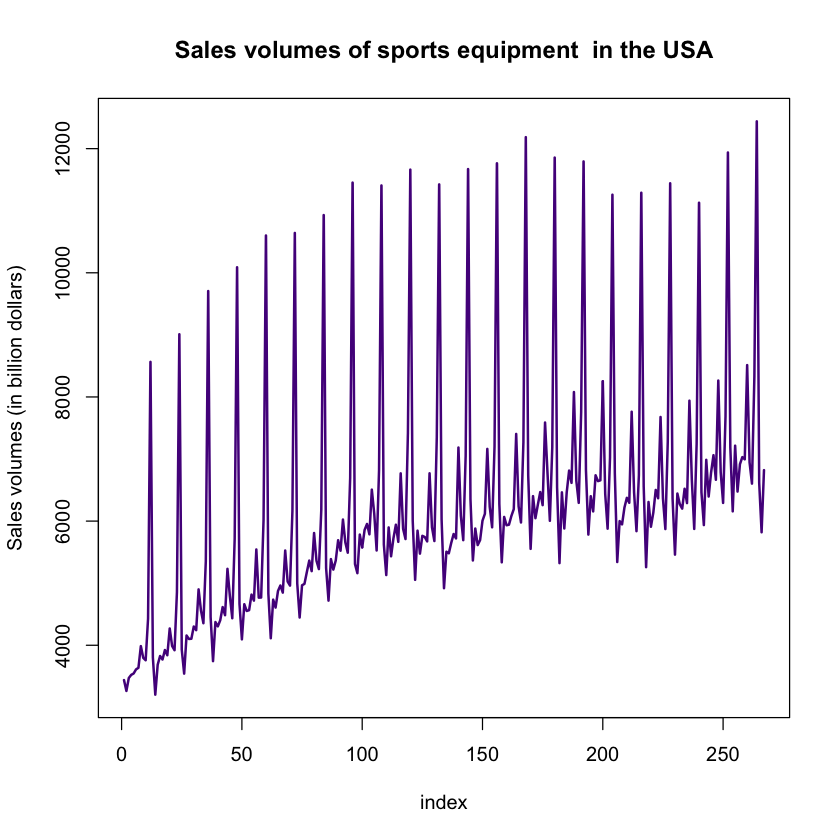

In [78]:
plot(sport, xlab="index", ylab="Sales volumes (in billion dollars)",
     main="Sales volumes of sports equipment  in the USA",
     col="purple4",lwd=2,type="l")

In [79]:
time<-c(1:length(sport))
Model1<-lm(sport~time)
summary(Model1)


Call:
lm(formula = sport ~ time)

Residuals:
    Min      1Q  Median      3Q     Max 
-1924.2  -808.5  -434.0     8.9  5725.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4589.144    195.438  23.481   <2e-16 ***
time          11.861      1.264   9.382   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1592 on 265 degrees of freedom
Multiple R-squared:  0.2493,	Adjusted R-squared:  0.2465 
F-statistic: 88.01 on 1 and 265 DF,  p-value: < 2.2e-16


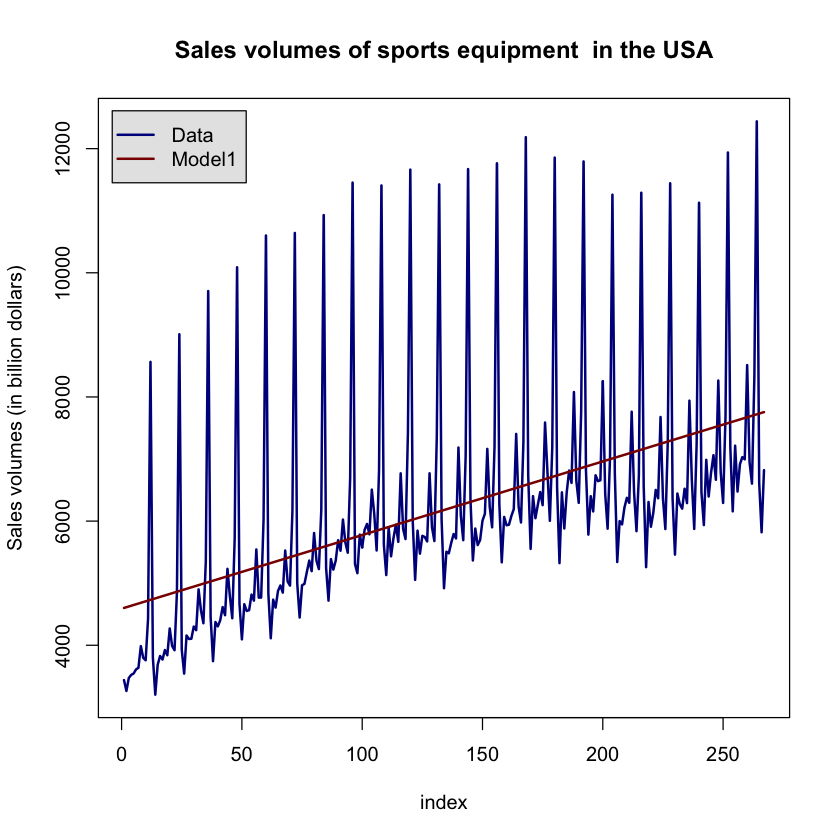

In [27]:
plot(sport, xlab="index", ylab="Sales volumes (in billion dollars)",
     main="Sales volumes of sports equipment  in the USA",
     col="blue4",lwd=2,type="l")
lines(time, Model1$fitted.values,
     col="red4",lwd=2,type="l")
legend("topleft", c("Data","Model1"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue4","red4"),pch=c('',''))

## Question 2:  
We propose to model $Y(t)$ with a quadratic linear function of time: $Y(t)=a+bt+ct^2+\varepsilon(t)$.   
Determine the coefficients a, b and c, as well as the coefficient of determination characterizing the model.     Analyse the result.

In [80]:
Model2<-lm(sport~time+I(time^2))
summary(Model2)


Call:
lm(formula = sport ~ time + I(time^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-1855.6  -701.4  -481.3   -91.1  5478.2 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3929.10165  290.05670  13.546  < 2e-16 ***
time          26.58307    4.99777   5.319 2.23e-07 ***
I(time^2)     -0.05493    0.01806  -3.042  0.00259 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1568 on 264 degrees of freedom
Multiple R-squared:  0.2747,	Adjusted R-squared:  0.2692 
F-statistic:    50 on 2 and 264 DF,  p-value: < 2.2e-16


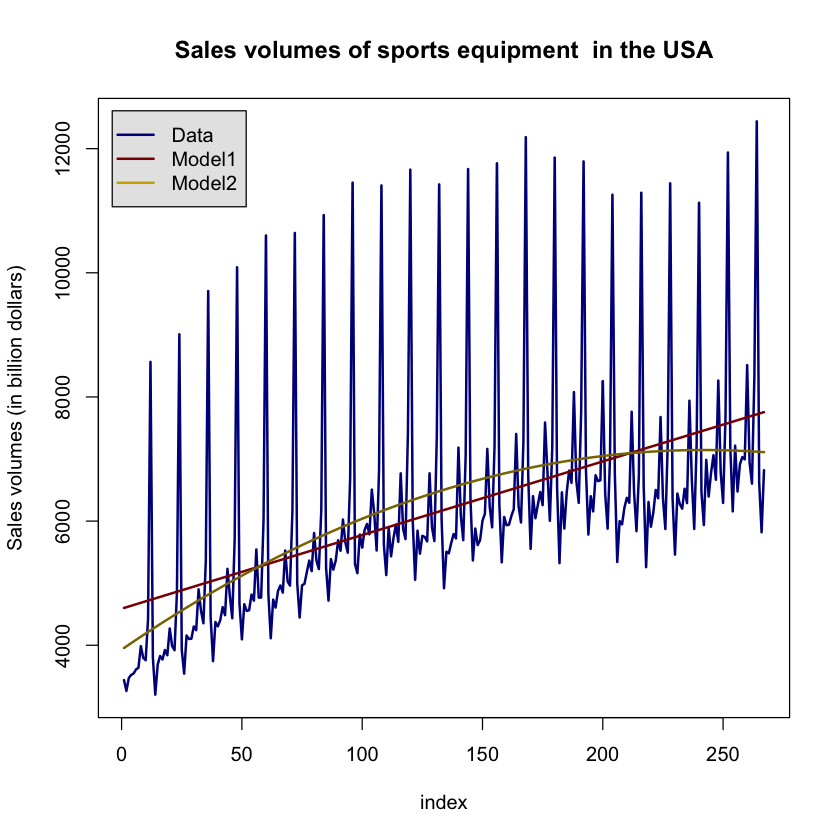

In [28]:
plot(sport, xlab="index", ylab="Sales volumes (in billion dollars)",
     main="Sales volumes of sports equipment  in the USA",
     col="blue4",lwd=2,type="l")
lines(time, Model1$fitted.values,
     col="red4",lwd=2,type="l")
lines(time, Model2$fitted.values,
     col="gold4",lwd=2,type="l")
legend("topleft", c("Data","Model1", "Model2"),inset = .02,
       bg = "gray90",lwd=c(2,2,2),col=c("blue4","red4","gold3"),pch=c('','',''))

# Question 3:  
Given the magnitude of the time and quadratic time, a possible way to improve the accuracy of the model is to standardize the explanatory variables.  
Re-examine the model in question 2 by replacing the time variable with standardized time.  
The standardized form of a series x is given by: $\displaystyle x = \frac{x-mean(x)}{sd(x)}$. 


In [81]:
time.st<-(time-mean(time))/sd(time)
Model3<-lm(sport~time.st+I(time.st^2))
summary(Model3)


Call:
lm(formula = sport ~ time.st + I(time.st^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-1855.6  -701.4  -481.3   -91.1  5478.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6504.85     143.95  45.190  < 2e-16 ***
time.st        915.91      96.14   9.527  < 2e-16 ***
I(time.st^2)  -327.57     107.69  -3.042  0.00259 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1568 on 264 degrees of freedom
Multiple R-squared:  0.2747,	Adjusted R-squared:  0.2692 
F-statistic:    50 on 2 and 264 DF,  p-value: < 2.2e-16


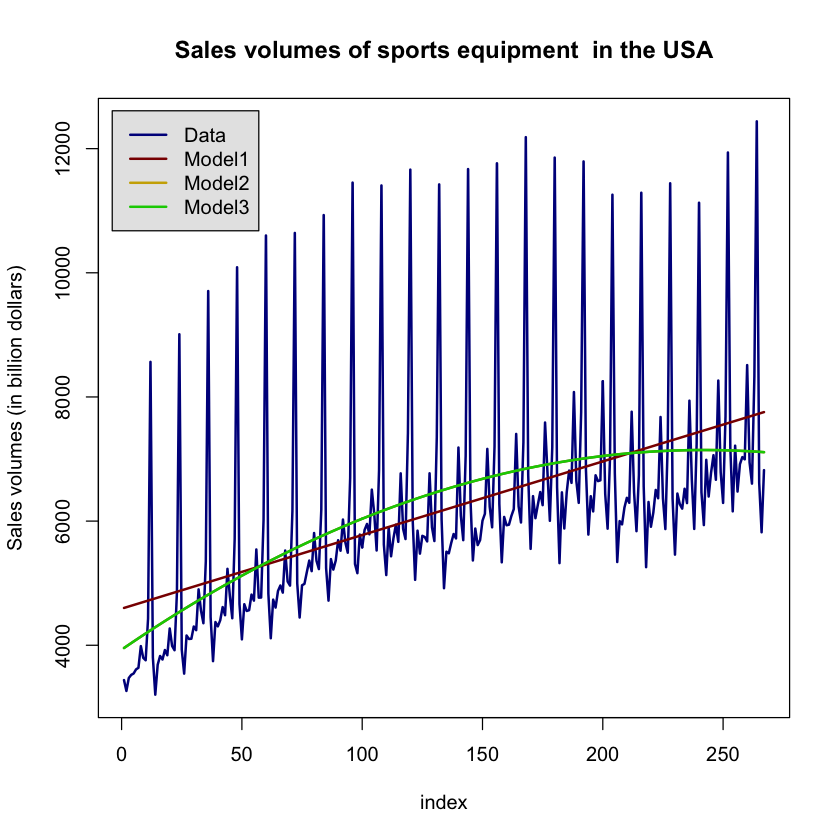

In [31]:
plot(sport, xlab="index", ylab="Sales volumes (in billion dollars)",
     main="Sales volumes of sports equipment  in the USA",
     col="blue4",lwd=2,type="l")
lines(time, Model1$fitted.values,
     col="red4",lwd=2,type="l")
lines(time, Model2$fitted.values,
     col="gold4",lwd=2,type="l")
lines(time, Model3$fitted.values,
     col="green3",lwd=2,type="l")
legend("topleft", c("Data","Model1", "Model2","Model3"),inset = .02,
       bg = "gray90",lwd=c(2,2,2),col=c("blue4","red4","gold3","green3"))

## Question4:  
Given the insufficiency of the time component to explain the evolution of $Y(t)$, we propose to introduce a seasonal component using harmonic functions or dummy variables.  

a- Propose a model describing the evolution of production as a function of standardized time and harmonic functions with periodicity 12 (annual)/dummy's variables.  
b- Re-estimate the model taking into account only the significant effects.


In [97]:
# with periodicity
T=12
MC=matrix(0,length(sport),6)
MS=matrix(0,length(sport),5)
for (i in 1:(T/2)){MC[,i]=cos(2*pi*i*time/T)}
for (i in 1:5){MS[,i]=sin(2*pi*i*time/T)}

Model4<-lm(sport~time.st+I(time.st^2)+MC+MS)
summary(Model4)


Call:
lm(formula = sport ~ time.st + I(time.st^2) + MC + MS)

Residuals:
    Min      1Q  Median      3Q     Max 
-868.80 -148.14    3.78  175.80  891.62 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6492.35      26.20 247.792  < 2e-16 ***
time.st        888.80      17.50  50.778  < 2e-16 ***
I(time.st^2)  -306.47      19.62 -15.622  < 2e-16 ***
MC1            910.13      24.76  36.764  < 2e-16 ***
MC2            997.00      24.70  40.359  < 2e-16 ***
MC3           1170.03      24.75  47.277  < 2e-16 ***
MC4            867.26      24.70  35.108  < 2e-16 ***
MC5            568.17      24.75  22.959  < 2e-16 ***
MC6            350.28      17.47  20.054  < 2e-16 ***
MS1           -365.25      24.67 -14.806  < 2e-16 ***
MS2            -15.24      24.71  -0.617    0.538    
MS3           -142.38      24.66  -5.774 2.25e-08 ***
MS4           -242.07      24.70  -9.800  < 2e-16 ***
MS5            153.50      24.66   6.225 1.99e-09 ***
---
Signif. codes: 

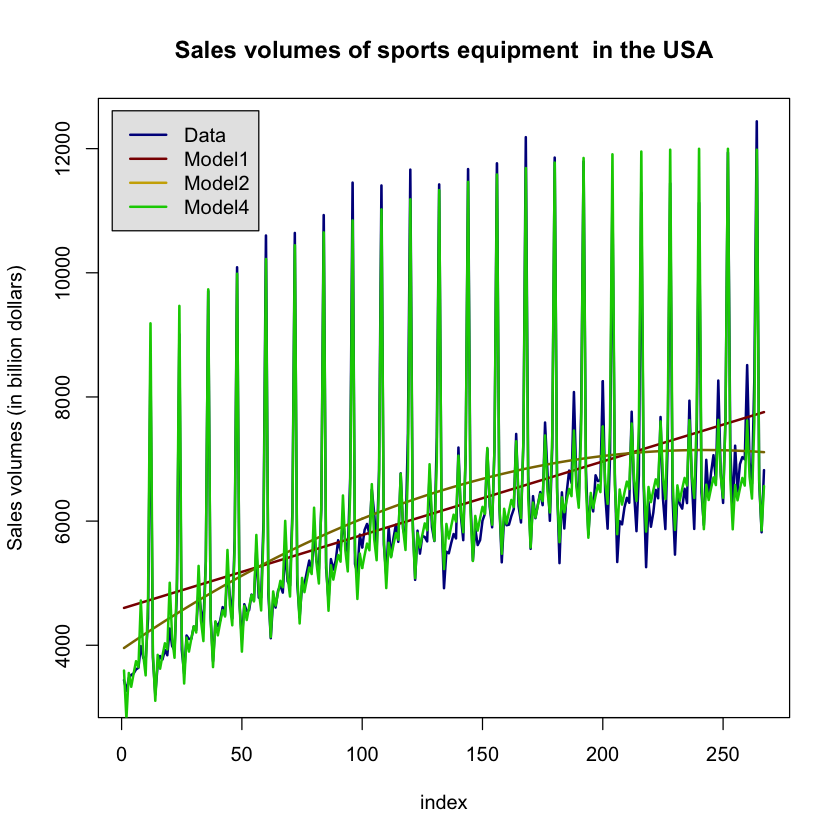

In [98]:
plot(sport, xlab="index", ylab="Sales volumes (in billion dollars)",
     main="Sales volumes of sports equipment  in the USA",
     col="blue4",lwd=2,type="l")
lines(time, Model1$fitted.values,
     col="red4",lwd=2,type="l")
lines(time, Model2$fitted.values,
     col="gold4",lwd=2,type="l")
lines(time, Model4$fitted.values,
     col="green3",lwd=2,type="l")
legend("topleft", c("Data","Model1", "Model2","Model4"),inset = .02,
       bg = "gray90",lwd=c(2,2,2),col=c("blue4","red4","gold3","green3"))

In [99]:
# with dummy variables
# n=number of periods, k= index, T=period
VD<-function(n,k,T)
{x<-rep(0,T*n)
for (i in 0:(n-1)){x[k+i*T]<-1}
 x
}
VD(3,3,12)
Nb=length(sport)/12
print("Number of cycles in data") 
Nb

[1] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0

[1] "Number of cycles in data"


[1] 22.25

In [100]:
# with dummy variables
# n=number of periods, k= index, T=period
VD<-function(n,k,T)
{x<-rep(0,T*n)
for (i in 0:(n-1)){x[k+i*T]<-1}
 x
}

Nb=length(sport)/12
print("Number of cycles in data") 
Nb

MVD<-matrix(0,23*T,T)
for(i in 1:12) MVD[,i]<-VD(23,i,12)

MVDF<-MVD[1:length(sport),]
MVDF[,12]

[1] "Number of cycles in data"


[1] 22.25

[1] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 [38] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [75] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
[112] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[149] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
[186] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
[223] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
[260] 0 0 0 0 1 0 0 0

In [101]:
length(sport)/12

[1] 22.25

In [102]:
Model5<-lm(sport~time+I(time^2)+MVDF)
summary(Model5)


Call:
lm(formula = sport ~ time + I(time^2) + MVDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-868.80 -148.14    3.78  175.80  891.62 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.890e+03  7.922e+01  112.22   <2e-16 ***
time         2.528e+01  9.104e-01   27.77   <2e-16 ***
I(time^2)   -5.140e-02  3.290e-03  -15.62   <2e-16 ***
MVDF1       -5.323e+03  8.512e+01  -62.54   <2e-16 ***
MVDF2       -6.128e+03  8.512e+01  -72.00   <2e-16 ***
MVDF3       -5.412e+03  8.512e+01  -63.59   <2e-16 ***
MVDF4       -5.660e+03  8.606e+01  -65.77   <2e-16 ***
MVDF5       -5.470e+03  8.605e+01  -63.56   <2e-16 ***
MVDF6       -5.297e+03  8.605e+01  -61.55   <2e-16 ***
MVDF7       -5.419e+03  8.605e+01  -62.98   <2e-16 ***
MVDF8       -4.368e+03  8.604e+01  -50.77   <2e-16 ***
MVDF9       -5.274e+03  8.604e+01  -61.29   <2e-16 ***
MVDF10      -5.623e+03  8.604e+01  -65.35   <2e-16 ***
MVDF11      -4.381e+03  8.6

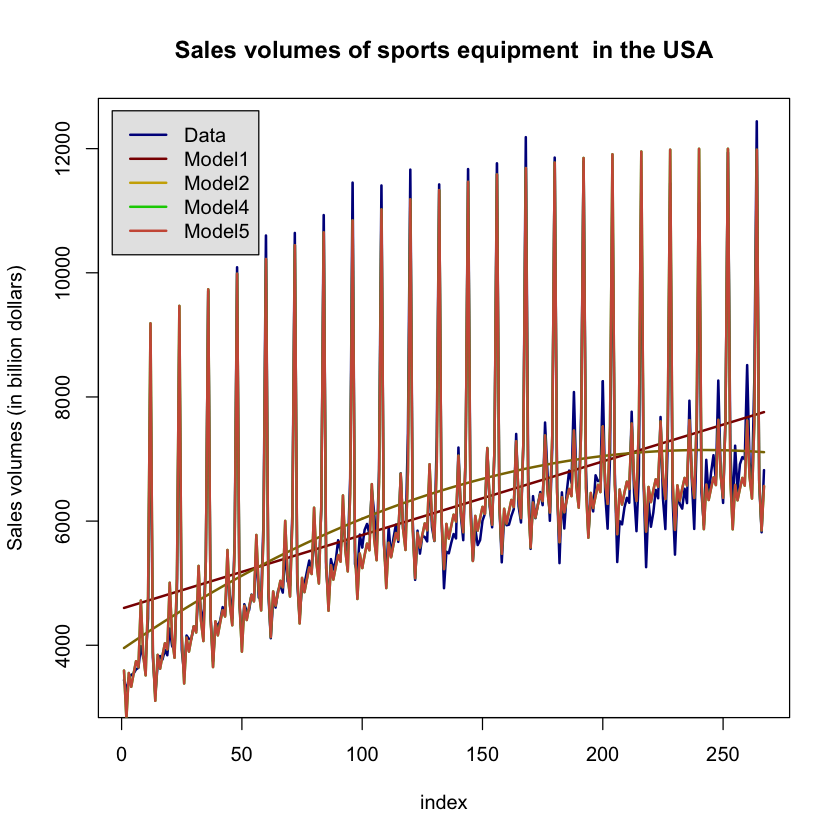

In [103]:
plot(sport, xlab="index", ylab="Sales volumes (in billion dollars)",
     main="Sales volumes of sports equipment  in the USA",
     col="blue4",lwd=2,type="l")
lines(time, Model1$fitted.values,
     col="red4",lwd=2,type="l")
lines(time, Model2$fitted.values,
     col="gold4",lwd=2,type="l")
lines(time, Model4$fitted.values,
     col="green3",lwd=2,type="l")
lines(time, Model5$fitted.values,
     col="coral3",lwd=2,type="l")
legend("topleft", c("Data","Model1", "Model2","Model4","Model5"),inset = .02,
       bg = "gray90",lwd=c(2,2,2),col=c("blue4","red4","gold3","green3","coral3"))

## Questios 5&6: 
5- Identify the best model among those identified in questions 2, 3 and 4, based on the statistics : AIC and adjusted $R^2$.  
6- Analyze the residuals associated to the obtained models using :  Acf, lagplot and QQplot.


In [104]:
AIC(Model1)
AIC(Model2)
AIC(Model5)

[1] 4698.84

[1] 4691.643

[1] 3792.428

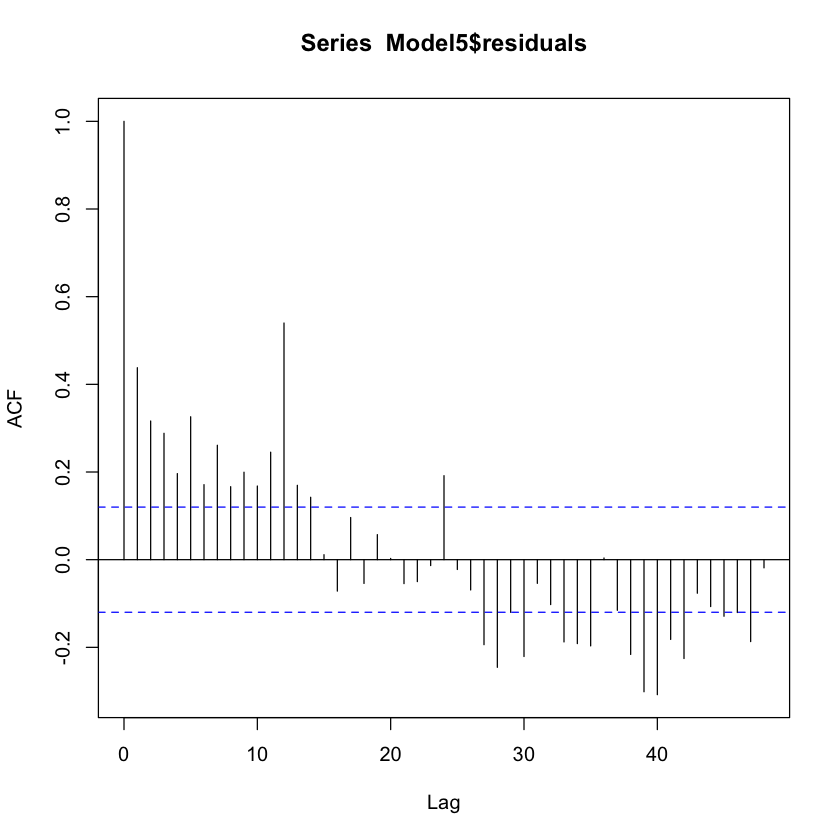

In [106]:
acf(Model5$residuals,lag=48)

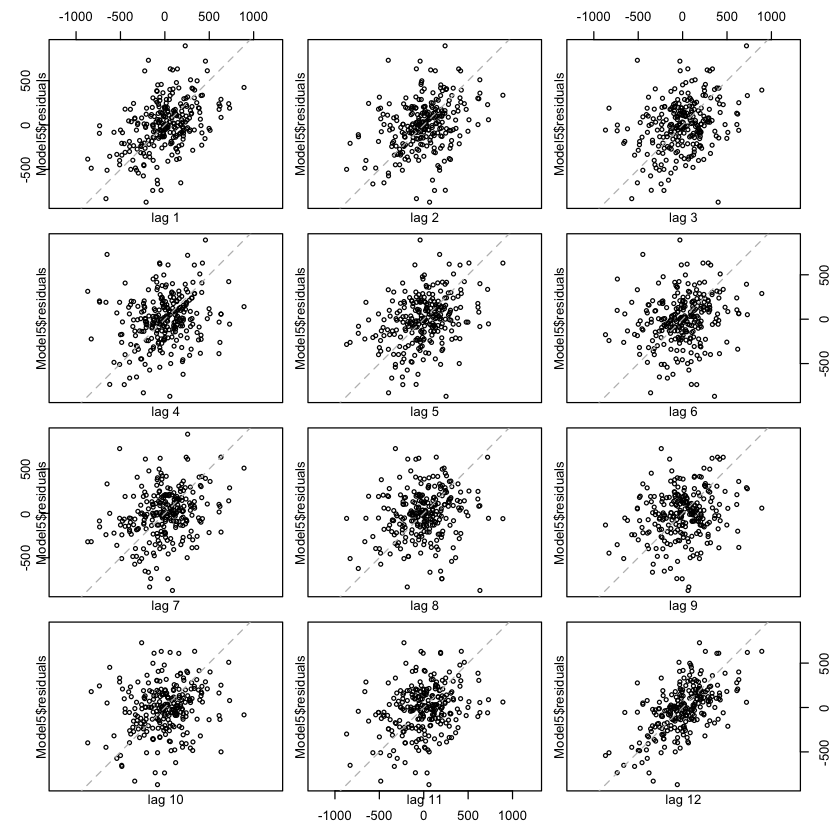

In [110]:
lag.plot(Model5$residuals,lag=12)

In [112]:
help(qqplot)

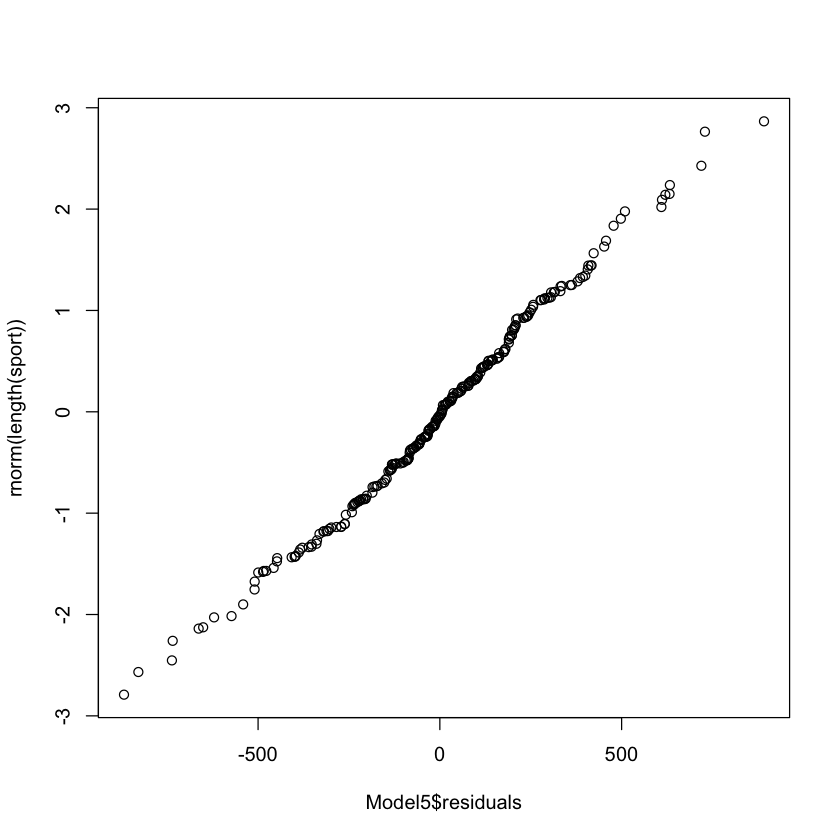

In [116]:
qqplot(Model5$residuals,rnorm(length(sport)))